In [42]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [43]:
#Importing the Dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [44]:
dataset = pd.get_dummies(dataset,drop_first = True)
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


In [45]:
#View Column Datas
dataset.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [46]:
#Assigning Independant and Dependant Dataset
ind = dataset[['User ID', 'Age', 'EstimatedSalary','Gender_Male']]
dep = dataset[['Purchased']]

In [47]:
ind

,User ID,Age,EstimatedSalary,Gender_Male
0,15624510,19,19000,True
1,15810944,35,20000,True
2,15668575,26,43000,False
3,15603246,27,57000,False
4,15804002,19,76000,True
...,...,...,...,...
395,15691863,46,41000,False
396,15706071,51,23000,True
397,15654296,50,20000,False
398,15755018,36,33000,True


In [48]:
dep

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [49]:
#Splitting Train and Test Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(ind,dep,random_state = 0,test_size = 0.3)

In [50]:
#Importing K_Neighbor_Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7,metric = 'minkowski',algorithm = 'auto', leaf_size = 30, p = 2)
classifier.fit(X_train,y_train)

/home/muthuvel/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [51]:
#Assigning Prediction
y_pred = classifier.predict(X_test)

In [52]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[70  9]
 [21 20]]


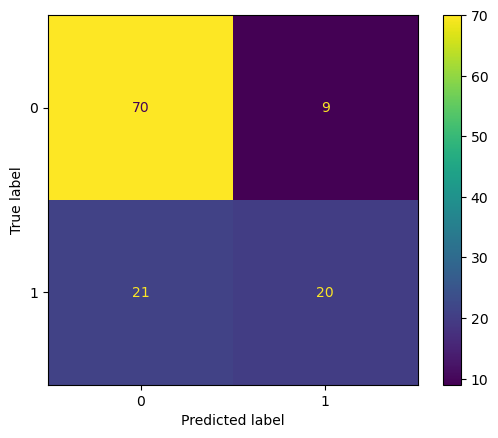

In [67]:
#Viewing Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [69]:
#View the Report for Evaluation Metric Values
from sklearn.metrics import classification_report
clf_report = classification_report(y_pred, y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.89      0.77      0.82        91
           1       0.49      0.69      0.57        29

    accuracy                           0.75       120
   macro avg       0.69      0.73      0.70       120
weighted avg       0.79      0.75      0.76       120

